#### Business Objective:
**Predict the Reliance Industries Stock Price for the next 30 days.
There are Open, High, Low and Close prices that you need to obtain from the web
for each day starting from 2015 to 2022 for Reliance Industries stock.**
* **Split the last year into a test set- to build a model to predict stock price.**
* **Find short term, &amp; long term trends.**
* **Understand how it is impacted from external factors or any big external events.**
* **Forecast for next 30 days.**
* **If there is an issue with infrastructure, then consider 2020 Jan 1st to till today**

## 1.Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nsepy import get_history
from datetime import date

import warnings
warnings.filterwarnings('ignore')

In [2]:
start_date = date(2015,1,1)
end_date = date(2022,12,31)

#Symbol is visible in NSE website. It's like a short name given to every company
reliance = get_history(symbol ='RELIANCE',start = start_date, end = end_date)
print(reliance)

              Symbol Series  Prev Close     Open     High      Low     Last  \
Date                                                                          
2015-01-01  RELIANCE     EQ      891.15   886.30   892.00   883.65   888.00   
2015-01-02  RELIANCE     EQ      887.90   888.10   896.05   884.30   884.95   
2015-01-05  RELIANCE     EQ      885.55   885.00   890.90   874.10   875.55   
2015-01-06  RELIANCE     EQ      875.85   870.00   873.00   832.00   832.50   
2015-01-07  RELIANCE     EQ      836.10   837.10   858.80   837.00   858.00   
...              ...    ...         ...      ...      ...      ...      ...   
2022-12-26  RELIANCE     EQ     2502.20  2514.75  2542.00  2492.40  2525.00   
2022-12-27  RELIANCE     EQ     2524.05  2530.00  2548.80  2515.25  2542.70   
2022-12-28  RELIANCE     EQ     2544.70  2538.00  2549.80  2521.50  2542.00   
2022-12-29  RELIANCE     EQ     2544.45  2527.00  2548.90  2525.50  2544.95   
2022-12-30  RELIANCE     EQ     2543.30  2545.10  25

In [3]:
#Converting the data to dataframe
data = pd.DataFrame(reliance)
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,RELIANCE,EQ,891.15,886.30,892.00,883.65,888.00,887.90,887.62,677439,6.013059e+13,16263,286377,0.4227
2015-01-02,RELIANCE,EQ,887.90,888.10,896.05,884.30,884.95,885.55,889.39,1675827,1.490461e+14,31269,1048543,0.6257
2015-01-05,RELIANCE,EQ,885.55,885.00,890.90,874.10,875.55,875.85,881.88,2309591,2.036781e+14,67035,1393132,0.6032
2015-01-06,RELIANCE,EQ,875.85,870.00,873.00,832.00,832.50,836.10,847.60,4258043,3.609133e+14,120767,2353273,0.5527
2015-01-07,RELIANCE,EQ,836.10,837.10,858.80,837.00,858.00,854.30,849.81,4736315,4.024972e+14,125939,2885468,0.6092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,RELIANCE,EQ,2502.20,2514.75,2542.00,2492.40,2525.00,2524.05,2523.81,2764496,6.977059e+14,117927,1225057,0.4431
2022-12-27,RELIANCE,EQ,2524.05,2530.00,2548.80,2515.25,2542.70,2544.70,2534.62,2659749,6.741453e+14,138609,1246382,0.4686
2022-12-28,RELIANCE,EQ,2544.70,2538.00,2549.80,2521.50,2542.00,2544.45,2537.68,3442509,8.735979e+14,158888,1908597,0.5544


In [4]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,RELIANCE,EQ,891.15,886.3,892.00,883.65,888.00,887.90,887.62,677439,6.013059e+13,16263,286377,0.4227
2015-01-02,RELIANCE,EQ,887.90,888.1,896.05,884.30,884.95,885.55,889.39,1675827,1.490461e+14,31269,1048543,0.6257
2015-01-05,RELIANCE,EQ,885.55,885.0,890.90,874.10,875.55,875.85,881.88,2309591,2.036781e+14,67035,1393132,0.6032
2015-01-06,RELIANCE,EQ,875.85,870.0,873.00,832.00,832.50,836.10,847.60,4258043,3.609133e+14,120767,2353273,0.5527
2015-01-07,RELIANCE,EQ,836.10,837.1,858.80,837.00,858.00,854.30,849.81,4736315,4.024972e+14,125939,2885468,0.6092


In [5]:
data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2022-12-26,RELIANCE,EQ,2502.20,2514.75,2542.0,2492.40,2525.00,2524.05,2523.81,2764496,6.977059e+14,117927,1225057,0.4431
2022-12-27,RELIANCE,EQ,2524.05,2530.00,2548.8,2515.25,2542.70,2544.70,2534.62,2659749,6.741453e+14,138609,1246382,0.4686
2022-12-28,RELIANCE,EQ,2544.70,2538.00,2549.8,2521.50,2542.00,2544.45,2537.68,3442509,8.735979e+14,158888,1908597,0.5544
2022-12-29,RELIANCE,EQ,2544.45,2527.00,2548.9,2525.50,2544.95,2543.30,2536.86,3198493,8.114145e+14,124496,1608415,0.5029
2022-12-30,RELIANCE,EQ,2543.30,2545.10,2577.0,2541.10,2547.00,2547.20,2559.73,3364092,8.611164e+14,147642,1557651,0.4630


In [6]:
data = data.reset_index()
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,RELIANCE,EQ,891.15,886.3,892.00,883.65,888.00,887.90,887.62,677439,6.013059e+13,16263,286377,0.4227
1,2015-01-02,RELIANCE,EQ,887.90,888.1,896.05,884.30,884.95,885.55,889.39,1675827,1.490461e+14,31269,1048543,0.6257
2,2015-01-05,RELIANCE,EQ,885.55,885.0,890.90,874.10,875.55,875.85,881.88,2309591,2.036781e+14,67035,1393132,0.6032
3,2015-01-06,RELIANCE,EQ,875.85,870.0,873.00,832.00,832.50,836.10,847.60,4258043,3.609133e+14,120767,2353273,0.5527
4,2015-01-07,RELIANCE,EQ,836.10,837.1,858.80,837.00,858.00,854.30,849.81,4736315,4.024972e+14,125939,2885468,0.6092


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1982 non-null   object 
 1   Symbol              1982 non-null   object 
 2   Series              1982 non-null   object 
 3   Prev Close          1982 non-null   float64
 4   Open                1982 non-null   float64
 5   High                1982 non-null   float64
 6   Low                 1982 non-null   float64
 7   Last                1982 non-null   float64
 8   Close               1982 non-null   float64
 9   VWAP                1982 non-null   float64
 10  Volume              1982 non-null   int64  
 11  Turnover            1982 non-null   float64
 12  Trades              1982 non-null   int64  
 13  Deliverable Volume  1982 non-null   int64  
 14  %Deliverble         1982 non-null   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 232.4+

In [8]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1.982000e+03,1.982000e+03,1.982000e+03,1.982000e+03,1982.000000
mean,1495.593971,1497.437967,1514.365439,1479.932265,1496.376615,1496.429516,1497.430954,7.739462e+06,1.231448e+15,1.892229e+05,3.328878e+06,0.478486
std,593.721756,594.501915,600.886661,587.715465,593.975223,594.035889,594.339382,6.683125e+06,1.267831e+15,1.429929e+05,2.262885e+06,0.122574
min,780.900000,791.750000,793.400000,779.100000,781.200000,780.900000,785.510000,2.995110e+05,2.781933e+13,8.723000e+03,9.803000e+04,0.114800
25%,993.250000,993.600000,1005.137500,984.162500,993.012500,993.737500,993.412500,3.732518e+06,4.036874e+14,9.139425e+04,1.909569e+06,0.398050
50%,1276.725000,1278.000000,1289.650000,1261.200000,1277.075000,1277.425000,1275.965000,5.908822e+06,8.987526e+14,1.562175e+05,2.752685e+06,0.489350
75%,2029.262500,2038.550000,2064.875000,2002.675000,2034.300000,2031.775000,2035.587500,9.309250e+06,1.580285e+15,2.329015e+05,4.042059e+06,0.564275
max,2819.850000,2856.150000,2856.150000,2786.100000,2810.000000,2819.850000,2823.910000,6.523089e+07,1.473434e+16,1.428490e+06,1.973411e+07,0.827000


In [11]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index(data['Date'])

In [12]:
df = data[['Open','High','Low','Close','Volume']]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,886.3,892.00,883.65,887.90,677439
2015-01-02,888.1,896.05,884.30,885.55,1675827
2015-01-05,885.0,890.90,874.10,875.85,2309591
2015-01-06,870.0,873.00,832.00,836.10,4258043
2015-01-07,837.1,858.80,837.00,854.30,4736315


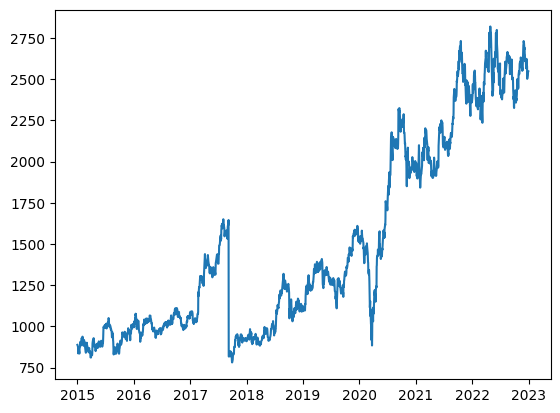

In [14]:
plt.plot(df.Close)

**Closing price of Reliance stock is showing upward trend.**

In [13]:
rel100 = df.Close.rolling(100).mean()
rel100

Date
2015-01-01          NaN
2015-01-02          NaN
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
                ...    
2022-12-26    2554.4035
2022-12-27    2554.1020
2022-12-28    2553.7000
2022-12-29    2553.0695
2022-12-30    2552.8225
Name: Close, Length: 1982, dtype: float64

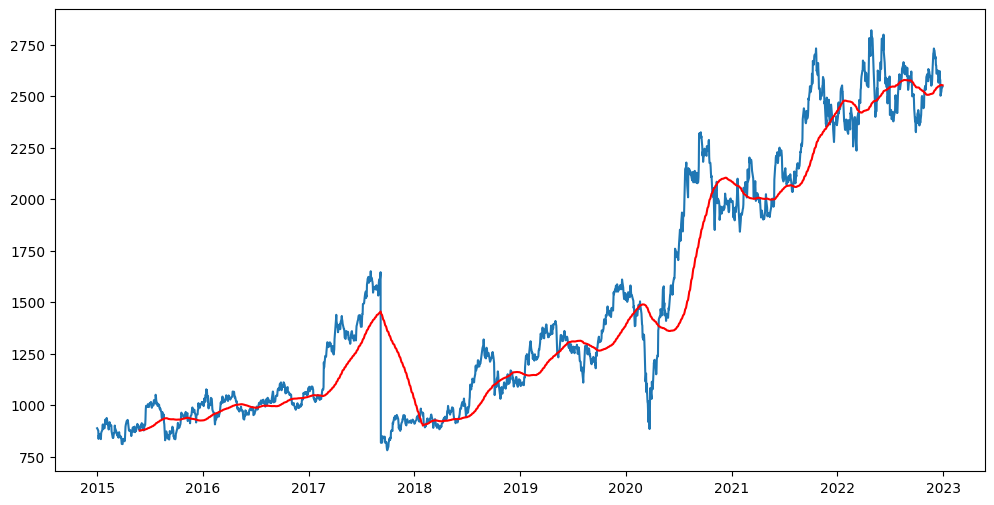

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(rel100,'r')

In [16]:
rel200 = df.Close.rolling(200).mean()
rel200

Date
2015-01-01           NaN
2015-01-02           NaN
2015-01-05           NaN
2015-01-06           NaN
2015-01-07           NaN
                 ...    
2022-12-26    2556.11350
2022-12-27    2557.65950
2022-12-28    2558.61125
2022-12-29    2559.36650
2022-12-30    2560.10675
Name: Close, Length: 1982, dtype: float64

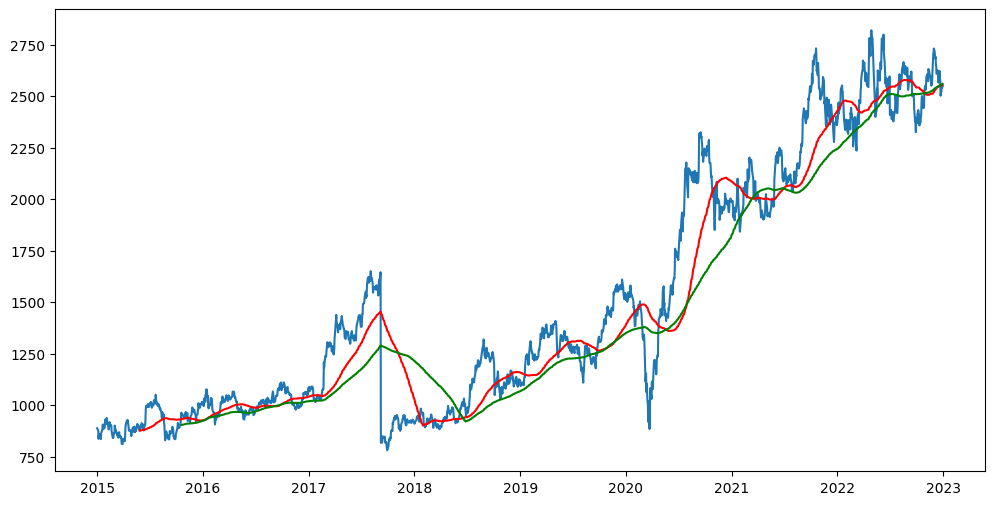

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(rel100,'r')
plt.plot(rel200,'g')

In [18]:
df.shape

(1982, 5)

In [21]:
#Splitting data into Training and Testing

train =pd.DataFrame(df['Close'][0:len(df)-248])
test = pd.DataFrame(df['Close'][len(df)-248:])
print(train.shape)
print(test.shape)

(1734, 1)
(248, 1)


In [22]:
train

,Close
Date,
2015-01-01,887.90
2015-01-02,885.55
2015-01-05,875.85
2015-01-06,836.10
2015-01-07,854.30
...,...
2021-12-27,2370.25
2021-12-28,2398.40
2021-12-29,2402.50


In [23]:
test

,Close
Date,
2022-01-03,2403.85
2022-01-04,2458.10
2022-01-05,2469.60
2022-01-06,2416.50
2022-01-07,2436.00
...,...
2022-12-26,2524.05
2022-12-27,2544.70
2022-12-28,2544.45


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [26]:
training_array = scaler.fit_transform(train)
training_array

array([[0.05484508],
       [0.05364053],
       [0.0486686 ],
       ...,
       [0.83118481],
       [0.80893923],
       [0.813578  ]])

In [28]:
training_array.shape

(1734, 1)

In [29]:
x_train = []
y_train = []

for i in range(100,training_array.shape[0]):
    x_train.append(training_array[i-100:i])
    y_train.append(training_array[i,0])

x_train

[array([[0.05484508],
        [0.05364053],
        [0.0486686 ],
        [0.02829391],
        [0.0376227 ],
        [0.0313437 ],
        [0.04069812],
        [0.03557241],
        [0.03190753],
        [0.02770445],
        [0.04272278],
        [0.04551629],
        [0.05061637],
        [0.06261052],
        [0.06450704],
        [0.05271791],
        [0.0543325 ],
        [0.05543453],
        [0.06455829],
        [0.07611676],
        [0.06886389],
        [0.06517338],
        [0.08031984],
        [0.07580922],
        [0.07319511],
        [0.06612163],
        [0.0593557 ],
        [0.05182091],
        [0.06140598],
        [0.0657372 ],
        [0.07001717],
        [0.06248238],
        [0.06189292],
        [0.06209795],
        [0.04725903],
        [0.03616187],
        [0.03103616],
        [0.03190753],
        [0.03131808],
        [0.03826341],
        [0.04318409],
        [0.04272278],
        [0.06145724],
        [0.05481945],
        [0.05333299],
        [0

In [30]:
y_train

[0.04925805376867681,
 0.062200466439427005,
 0.060355211563597244,
 0.05917629872626162,
 0.0675568312873216,
 0.06501960583305572,
 0.05358927701888827,
 0.05269227812091548,
 0.06402009277531462,
 0.049334939388503085,
 0.05584458853379126,
 0.06194418104000621,
 0.0630718367974577,
 0.07703939106589103,
 0.10151464671057692,
 0.11058714985007306,
 0.10804992439580724,
 0.10974140803198446,
 0.1076398677567339,
 0.11463645916092163,
 0.11266306158538159,
 0.10761423921679186,
 0.1123555191060766,
 0.11520028703964741,
 0.11786565519362363,
 0.11599477177785184,
 0.12027473794817906,
 0.1139701171224276,
 0.11056152131013103,
 0.10584586996078832,
 0.11322688946410725,
 0.11589225761808358,
 0.11117660626874087,
 0.11801942643327618,
 0.12445218995873814,
 0.12342704836105495,
 0.12499038929752176,
 0.11630231425715681,
 0.13813783028780863,
 0.13552371921371636,
 0.1251441605371742,
 0.11504651579999498,
 0.11755811271431865,
 0.11025397883082605,
 0.11238114764601864,
 0.1132525180

In [31]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [34]:
x_train.shape

(1634, 100, 1)

In [32]:
#ML Model

In [33]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [35]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu',return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [38]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
52/52 [==============================] - 29s 328ms/step - loss: 0.0330
Epoch 2/50
52/52 [==============================] - 16s 305ms/step - loss: 0.0094
Epoch 3/50
52/52 [==============================] - 15s 292ms/step - loss: 0.0078
Epoch 4/50
52/52 [==============================] - 16s 300ms/step - loss: 0.0071
Epoch 5/50
52/52 [==============================] - 17s 333ms/step - loss: 0.0068
Epoch 6/50
52/52 [==============================] - 15s 284ms/step - loss: 0.0066
Epoch 7/50
52/52 [==============================] - 15s 297ms/step - loss: 0.0050
Epoch 8/50
52/52 [==============================] - 16s 298ms/step - loss: 0.0048
Epoch 9/50
52/52 [==============================] - 15s 296ms/step - loss: 0.0067
Epoch 10/50
52/52 [==============================] - 15s 289ms/step - loss: 0.0054
Epoch 11/50
52/52 [==============================] - 28s 537ms/step - loss: 0.0043
Epoch 12/50
52/52 [==============================] - 15s 290ms/step - loss: 0.0049
Epoch 13/50
5

In [39]:
model.save('keras_model.h5')

In [40]:
test.head()

,Close
Date,
2022-01-03,2403.85
2022-01-04,2458.10
2022-01-05,2469.60
2022-01-06,2416.50
2022-01-07,2436.00


**For predicting these testing values, we need previous 100 days as x value.So we have to add those values also.**

In [41]:
past_100_days = train.tail(100)
past_100_days

,Close
Date,
2021-08-09,2077.15
2021-08-10,2088.05
2021-08-11,2117.30
2021-08-12,2110.50
2021-08-13,2145.65
...,...
2021-12-27,2370.25
2021-12-28,2398.40
2021-12-29,2402.50


In [43]:
final_df = past_100_days.append(test)
final_df

,Close
Date,
2021-08-09,2077.15
2021-08-10,2088.05
2021-08-11,2117.30
2021-08-12,2110.50
2021-08-13,2145.65
...,...
2022-12-26,2524.05
2022-12-27,2544.70
2022-12-28,2544.45


In [45]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.01467618],
       [0.05405951],
       [0.04490373],
       [0.09223105],
       [0.12972937],
       [0.11727481],
       [0.12858489],
       [0.09573179],
       [0.11471657],
       [0.14346304],
       [0.16891073],
       [0.20640905],
       [0.20230241],
       [0.25999731],
       [0.2437054 ],
       [0.25575603],
       [0.2925138 ],
       [0.41921368],
       [0.46916655],
       [0.48976707],
       [0.47690858],
       [0.46916655],
       [0.39639154],
       [0.39221758],
       [0.40548001],
       [0.4726673 ],
       [0.42197388],
       [0.42709035],
       [0.44102599],
       [0.4757641 ],
       [0.55574256],
       [0.5460482 ],
       [0.60226202],
       [0.63403797],
       [0.60683991],
       [0.59526054],
       [0.60125219],
       [0.64494412],
       [0.71637269],
       [0.64992595],
       [0.66682375],
       [0.79991921],
       [0.77487545],
       [0.795274  ],
       [0.83182981],
       [0.8391679 ],
       [0.848

In [46]:
input_data.shape

(348, 1)

In [47]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [48]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(248, 100, 1)
(248,)


In [49]:
#Making predictions

y_predicted = model.predict(x_test)

8/8 [==============================] - 2s 94ms/step


In [50]:
y_predicted.shape

(248, 1)

In [51]:
y_test

array([0.43988151, 0.51292581, 0.52840986, 0.45691396, 0.48316952,
       0.48586239, 0.50949239, 0.59775145, 0.61687088, 0.6218527 ,
       0.63969301, 0.59869395, 0.59842467, 0.5389794 , 0.53951797,
       0.40494143, 0.39868049, 0.35135317, 0.34832368, 0.41665545,
       0.40601858, 0.41254881, 0.3710785 , 0.34219739, 0.32307796,
       0.37552174, 0.41248149, 0.40918271, 0.40292177, 0.35195907,
       0.4588663 , 0.45213411, 0.49326781, 0.46755083, 0.43456308,
       0.4198869 , 0.39975764, 0.24047395, 0.27844352, 0.38023428,
       0.43274539, 0.40548001, 0.33445537, 0.21866164, 0.21320856,
       0.37289619, 0.42426282, 0.43355325, 0.46007809, 0.38548539,
       0.43920829, 0.54470176, 0.52544769, 0.61128316, 0.62212199,
       0.67523899, 0.69839774, 0.73353979, 0.73434765, 0.80220816,
       0.7507742 , 0.77918406, 0.7897536 , 0.73906019, 0.72963512,
       0.66742965, 0.72505722, 0.71771913, 0.65154167, 0.63888515,
       0.62838293, 0.75892016, 0.86347112, 0.94917194, 0.91779

In [52]:
y_predicted

array([[0.38679338],
       [0.40205586],
       [0.4158942 ],
       [0.42966157],
       [0.4429899 ],
       [0.45556104],
       [0.46705395],
       [0.4777187 ],
       [0.4889562 ],
       [0.50192195],
       [0.51710147],
       [0.53448087],
       [0.55281526],
       [0.5705287 ],
       [0.58443457],
       [0.59171355],
       [0.5795996 ],
       [0.5359219 ],
       [0.45980263],
       [0.3731997 ],
       [0.31599343],
       [0.29443753],
       [0.2993706 ],
       [0.3199145 ],
       [0.344945  ],
       [0.36671323],
       [0.38305652],
       [0.39464116],
       [0.40296984],
       [0.4092965 ],
       [0.41314393],
       [0.41599178],
       [0.41925907],
       [0.4242593 ],
       [0.43133295],
       [0.43924227],
       [0.44604224],
       [0.44891632],
       [0.42907405],
       [0.3791911 ],
       [0.3246818 ],
       [0.29379702],
       [0.2873558 ],
       [0.2948565 ],
       [0.30363822],
       [0.2989219 ],
       [0.29182714],
       [0.291

In [53]:
scaler.scale_

array([0.00134644])

In [54]:
scale_factor = 1/0.00134644
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

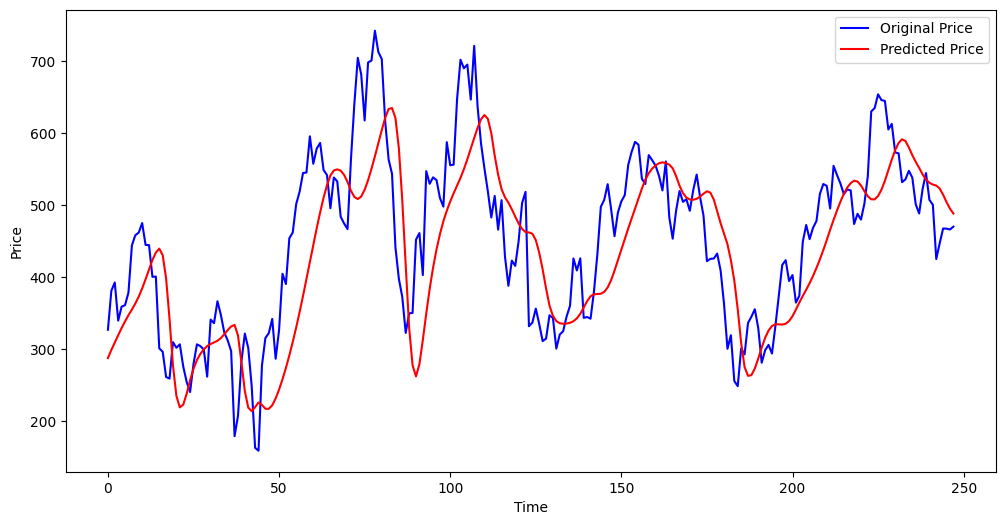

In [55]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

**Even though it is not giving the perfect values, it is giving us a perfect trend.** 